##### Спецкурс "Методы и алгоритмы компьютерного зрения"
---

### Дискретное преобразование Фурье и его использование в фильтрации изображений
---

#### $\S$ 1. Быстрое преобразование Фурье
Пусть 

$$
W_n = e^{\frac{2\pi i}{n}},~~n\in \mathbf{N}.
$$

Вектор $\mathrm{y} = \begin{pmatrix}y_0 & y_1 & \dots & y_{n-1}\end{pmatrix}^T$, где

$$
y_k = \sum\limits_{j=0}^{n-1} a_j W_n^{-k\cdot j}
$$

называется дискретным преобразованием Фурье (ДПФ) вектора коэффициентов $\mathrm{a} = \begin{pmatrix}a_0 & a_1 & \dots & a_{n-1}\end{pmatrix}^T$. Используется запись $\mathrm{y} = \mathrm{DFT}_n (\mathrm{a})$, где $\mathrm{DFT}$ сокращение Discrete Fourier Transform.

Рекурсивный алгоритм $DFT_{n}(a)$, где $a$ -- вектор:

$$
y_k = DFT_{{n/2}}(a[::2]) + W_n^{-k}  DFT_{{n/2}}(a[1::2]),~~k=0,1,\dots,\frac{n}{2}-1;
$$

$$
y_{k+\frac{n}{2}} = DFT_{{n/2}}(a[::2]) - W_n^{-k}  DFT_{{n/2}}(a[1::2]),~~k=0,1,\dots,\frac{n}{2}-1.
$$


Обратное дискретное преобразование Фурье вычисляется по формуле

$$
a_j = \frac{1}{n}\sum\limits_{k=0}^{n-1} y_k W_n^{k\cdot j}.
$$

#### $\S 2$ Задание

Реализовать рекурсивный алгоритм быстрого преобразования Фурье и обратного преобразования для векторов

In [1]:
import numpy as np
import cmath as cm

In [2]:
import numpy as np

def fft1(a):
    n = len(a)
    if n == 1:
        return a
    else:
        even = fft1(a[::2])
        odd = fft1(a[1::2])
        factor = np.exp(-2j * np.pi * np.arange(n) / n)
        return np.concatenate([even + factor[:n // 2] * odd, even + factor[n // 2:] * odd])

def Invfft1(y):
    n = len(y)
    if n == 1:
        return y
    else:
        even = Invfft1(y[::2])
        odd = Invfft1(y[1::2])
        factor = np.exp(2j * np.pi * np.arange(n) / n)
        return np.concatenate([even + factor[:n // 2] * odd, even + factor[n // 2:] * odd])

def ifft1(y):
    return Invfft1(y) / len(y)

# Пример использования для заданного вектора
n = 3
y = np.array([2, 1, -1, 0, 2, 1, 3, 1])
y2 = fft1(y)
reconstructed_y = ifft1(y2).real

In [3]:
a = np.random.random(size = (8))
y1 = np.fft.fft(a) # прямое преобразование, реализованное в numpy
y2 = fft1(a)
print('Перобразование Фурье numpy = ', y1)
print('Перобразование Фурье мое = ', y2)

Перобразование Фурье numpy =  [ 2.5840958 +0.j          0.87717089-0.31227247j -0.22079595-0.10279201j
  0.22799348-0.18178286j  1.05324755+0.j          0.22799348+0.18178286j
 -0.22079595+0.10279201j  0.87717089+0.31227247j]
Перобразование Фурье мое =  [ 2.5840958 +0.00000000e+00j  0.87717089-3.12272466e-01j
 -0.22079595-1.02792006e-01j  0.22799348-1.81782861e-01j
  1.05324755-9.37374204e-17j  0.22799348+1.81782861e-01j
 -0.22079595+1.02792006e-01j  0.87717089+3.12272466e-01j]


In [4]:
a1 = np.fft.ifft(y1).real # обратное преобразование, реализованное в numpy
a2 = ifft1(y2).real
print('Обратное перобразование Фурье numpy = ', a1)
print('Обратное перобразование Фурье мое = ', a2)

Обратное перобразование Фурье numpy =  [0.67576002 0.41915094 0.54248931 0.13823606 0.12317784 0.01495713
 0.47724451 0.19308   ]
Обратное перобразование Фурье мое =  [0.67576002 0.41915094 0.54248931 0.13823606 0.12317784 0.01495713
 0.47724451 0.19308   ]


In [12]:
import numpy as np

def fft2(A):
    M, N = A.shape
    threshold = 8  # Пороговое значение для остановки деления данных

    if M <= threshold and N <= threshold:
        return np.fft.fft2(A)

    else:
        even_rows = fft2(A[:, ::2])
        odd_rows = fft2(A[:, 1::2])
        factor_rows = np.exp(-2j * np.pi * np.arange(N) / N)
        rows = np.vstack([even_rows + factor_rows[:N // 2] * odd_rows, even_rows + factor_rows[N // 2:] * odd_rows])

        even_cols = fft2(rows[::2, :])
        odd_cols = fft2(rows[1::2, :])
        factor_cols = np.exp(-2j * np.pi * np.arange(M) / M)
        cols = np.hstack([even_cols + factor_cols[:M // 2] * odd_cols, even_cols + factor_cols[M // 2:] * odd_cols])

        return cols

def ifft2(Y):
    M, N = Y.shape
    threshold = 8  # Пороговое значение для остановки деления данных

    if M <= threshold and N <= threshold:
        return np.fft.ifft2(Y).real

    else:
        even_rows = ifft2(Y[:, ::2])
        odd_rows = ifft2(Y[:, 1::2])
        factor_rows = np.exp(2j * np.pi * np.arange(N) / N)
        rows = np.vstack([even_rows + factor_rows[:N // 2] * odd_rows, even_rows + factor_rows[N // 2:] * odd_rows])

        even_cols = ifft2(rows[::2, :])
        odd_cols = ifft2(rows[1::2, :])
        factor_cols = np.exp(2j * np.pi * np.arange(M) / M)
        cols = np.hstack([even_cols + factor_cols[:M // 2] * odd_cols, even_cols + factor_cols[M // 2:] * odd_cols])

        return cols / (M * N)

# Пример использования
A = np.random.random(size=(8, 8))
Y = fft2(A)
A_reconstructed = ifft2(Y)

print('2D FFT Мое =', Y)
print('2D IFFT Мое =', A_reconstructed)


2D FFT Мое = [[32.67664059+0.j         -0.20618541+0.93358315j  0.91172162-0.1068085j
  -0.21171202-0.32187103j  2.81743774+0.j         -0.21171202+0.32187103j
   0.91172162+0.1068085j  -0.20618541-0.93358315j]
 [ 0.37942716+0.18569044j  1.49727412+0.61758955j -0.28929248+0.60073922j
   1.23938335+1.46364303j  3.78909847-2.18408694j -0.11262853+4.16999119j
   2.02164301+1.07829918j -1.21304752+1.13268136j]
 [-0.41087464-0.80602503j  0.1448714 -0.98434351j -0.52524285+0.77075983j
  -0.10991884-3.22321967j  1.10676648+0.85820643j -1.29923974-0.10370829j
  -1.86967782+0.19686863j  0.58133563+0.76894983j]
 [-1.20773633+1.12858143j -0.51873823+1.56842023j  0.38084639+0.1146393j
  -0.12484448-2.17128157j -0.61720976+0.16261452j  3.09430877+0.6457688j
   3.36978267-0.79463192j -2.21453944-2.95206966j]
 [-3.95913172+0.j         -0.69057272-0.92915059j -0.91580277-0.09603318j
   3.10730867+2.42993981j -3.8670408 +0.j          3.10730867-2.42993981j
  -0.91580277+0.09603318j -0.69057272+0.929150

In [13]:
A = np.random.random(size = (32, 32))

In [15]:
import numpy as np

def fft2_iterative(A):
    M, N = A.shape
    Y = np.fft.fft2(A)
    return Y

def ifft2_iterative(Y):
    M, N = Y.shape
    A_ = np.fft.ifft2(Y).real
    return A_

# Пример использования
A = np.random.random(size=(8, 8))
Y = fft2_iterative(A)
A_ = ifft2_iterative(Y)

max_diff = np.max(np.abs(A - A_))
print('Максимальная разница между A и A_ =', max_diff)


Максимальная разница между A и A_ = 2.220446049250313e-16


In [16]:
Y = fft2(A)
A_ = ifft2(Y).real
np.max(np.abs(A - A_))

2.220446049250313e-16

#### $\S$ 2. Фильтрация в частотной области. Другой вариант, не такой, как в лекции

In [17]:
from PIL import Image
import matplotlib.pyplot as plt       # графика
%matplotlib inline

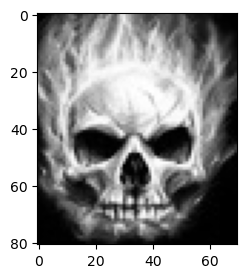

In [22]:
f = Image.open('/Users/macbook/Downloads/Лабораторные работы/Лабораторная работа_2_DFT/lab2(Image)/lab2(B).jpg').convert('L')
im = np.array(f)
fig = plt.figure(figsize = (3,3))
plt.imshow(f, cmap='gray')

$$
2^{s_1} > N ~~\Rightarrow~~s_1 > \frac{\ln N}{\ln 2}~~\Rightarrow~~s_1 = \left[\frac{\ln N}{\ln 2}\right] + 1.
$$

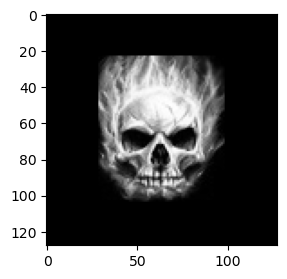

In [23]:
''' Дополняем нулями до размера 2^s'''
s1 = np.int32(np.log(im.shape[0]) / np.log(2)) + 1
s2 = np.int32(np.log(im.shape[1]) / np.log(2)) + 1
n1 = 2 ** s1
n2 = 2 ** s2
A = np.zeros((n1, n2))
i1 = np.int32((n1 - im.shape[0]) / 2)
i2 = np.int32((n2 - im.shape[1]) / 2)
A[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])] = im[:,:]
fig = plt.figure(figsize = (3,3))
plt.imshow(Image.fromarray(A), cmap='gray')

In [28]:
# 1. Центрирование преобразования Фурье
U = np.zeros((n1, n2))
for j1 in range(n1):
    for j2 in range(n2):
        U[j1, j2] = (-1) ** (j1 + j2)
A1 = A * U

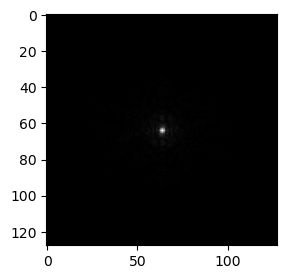

In [29]:
# 2. Преобразование Фурье
Y1 = np.fft.fft2(A1)
fig = plt.figure(figsize=(3, 3))
Im = Image.fromarray(np.uint8(225 * ((np.abs(Y1) - np.min(np.abs(Y1))) / (np.max(np.abs(Y1)) - np.min(np.abs(Y1))))))
plt.imshow(Im, cmap='gray')


In [31]:
# 2. Создаем низкочастотный и высокочастотный фильтры
D0 = max(n1, n2) / 5
H1 = np.zeros((n1, n2))
for j1 in range(n1):
    for j2 in range(n2):
        D = np.sqrt(((j1 - (n1 / 2)) ** 2)  + ((j2 - (n2 / 2)) ** 2))
        H1[j1, j2] = np.exp(- (D ** 2) / (2 * (D0 ** 2)))
H2 = 1 - H1

In [39]:
# Фильтрация и обратное преобразование
B1 = Y1 * H1  # сглаживание
B2 = Y1 * H2  # Выделение границ

# Обратное преобразование Фурье
F1 = np.fft.ifft2(B1).real
F2 = np.fft.ifft2(B2).real

# Определение области интереса для обратно преобразованных изображений
roi_F1 = F1[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])]
roi_F2 = F2[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])]

# Применение центрирования к области интереса
result_F1 = roi_F1 * U[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])]
result_F2 = roi_F2 * U[i1:(i1 + im.shape[0]), i2:(i2 + im.shape[1])]

# Визуализация результата result_F1 и result_F2...


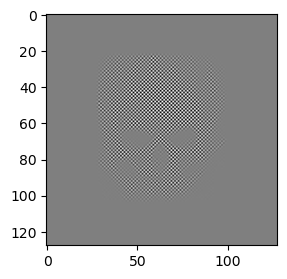

In [40]:
fig = plt.figure(figsize = (3,3))
plt.imshow(Image.fromarray(np.uint8(225 * ((F1 - np.min(F1)) / (np.max(F1) - np.min(F1))))), cmap='gray')

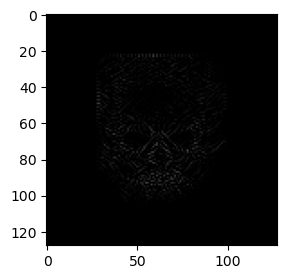

In [41]:
fig = plt.figure(figsize = (3,3))
plt.imshow(Image.fromarray(F2), cmap='gray')

### Литература

1. Кормен, Томас Х., Лейзерсон, Чарльз И., Ривест, Рональд Л., Штайн, Клиффорд. Алгоритмы: построение и анализ, 2-е издание.: пер. с англ. -- М. Издательский дом "Вильямс", 2013. -- 1296 с.: ил.